<a href="https://colab.research.google.com/github/Rishabh672003/Learning-machine-learning/blob/main/Convolutional_neural_network_simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model


In [3]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10;

(x_train, y_train), (x_test, y_test) = cifar10.load_data();
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape:", x_train.shape)
print("y_train.shape", y_train.shape)

170498071/170498071 [==============================] - 2s 0us/step
x_train.shape: (50000, 32, 32, 3)
y_train.shape (50000,)


In [4]:
# number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [5]:
# Build the model using the functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 14s 5ms/step - loss: 1.5795 - accuracy: 0.4276 - val_loss: 1.2665 - val_accuracy: 0.5453
Epoch 2/15
1563/1563 [==============================] - 10s 7ms/step - loss: 1.2869 - accuracy: 0.5345 - val_loss: 1.1836 - val_accuracy: 0.5828
Epoch 3/15
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1574 - accuracy: 0.5843 - val_loss: 1.0445 - val_accuracy: 0.6269
Epoch 4/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0644 - accuracy: 0.6214 - val_loss: 1.0301 - val_accuracy: 0.6421
Epoch 5/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9945 - accuracy: 0.6456 - val_loss: 0.9482 - val_accuracy: 0.6700
Epoch 6/15
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9313 - accuracy: 0.6666 - val_loss: 0.9210 - val_accuracy: 0.6788
Epoch 7/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8825 - accuracy: 0.6866 - val_loss: 0.8762 - val_accurac

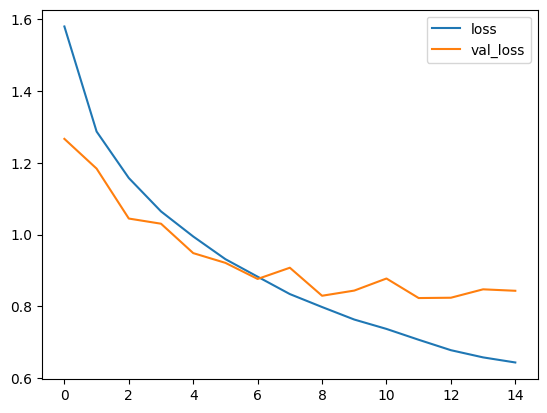

In [7]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend();

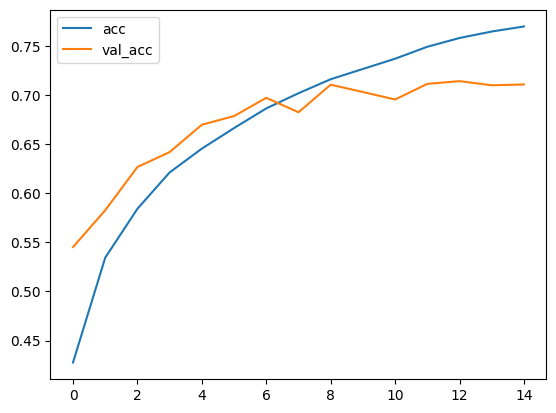

In [8]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend();

313/313 [==============================] - 1s 2ms/step
Confusion matrix, without normalization
[[722  31  49  33  27   8  24  16  65  25]
 [  8 865   6   9   4  10  23   6  19  50]
 [ 51   4 544  91 100  77  84  33  12   4]
 [ 15   1  50 549  60 181  97  33   8   6]
 [ 15   3  58  72 688  42  59  55   8   0]
 [  8   5  35 179  51 629  45  44   2   2]
 [  4   7  30  48  43  26 825  14   3   0]
 [  7   0  26  43  75  64  14 762   0   9]
 [ 61  49  14  24   9  14  10   5 795  19]
 [ 24 122   8  26   9  16  11  29  24 731]]


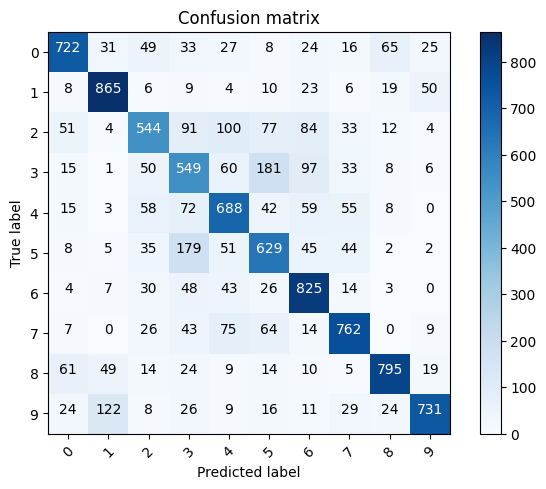

In [9]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [10]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

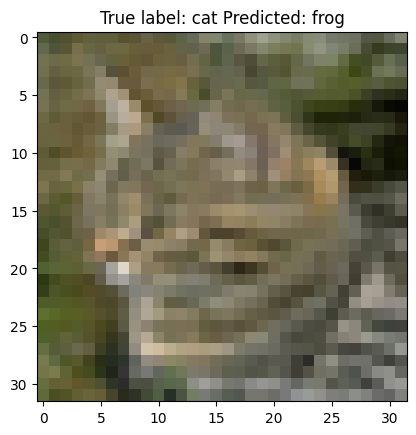

In [11]:
# Show some misclassified examples
# TODO: add label names
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));